# Model Selection and Goodness of Fit
## Part 1 of 2




This notebook accompanies the ECE595 Data analytics course taught at Purdue in Fall 2022. These set of examples pertain to the materials of [Lecture 5.](https://github.com/alam740/Data-Analytics-Course/blob/master/Lecture-PDFs/ECE%20595%20-%20Lecture%2004B.pdf)

Written by Rohan Sheridan (sherida7@purdue.edu)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import bootstrap 

In [ ]:
X = np.array([0.2, -0.1, 0.5, 0.3, -0.6])

from sklearn.utils import resample

print("Underlying Sample: \n\n",X)

offset = 0

def bsSamples(x,n):

  samples = []
  for i in range(n):
    rand = i + offset # set the random state for synthetic sample
                      # Must change each iteration to create new samples
                      # But we define rand for repeatability
                      # that is, each time we run the code we get the same
                      # random samples
                      
    ## generate ith random sample

    samples.append(resample(x, random_state=i, n_samples=len(x))) 


  return samples

n = 10

samples = bsSamples(X,n)
print("\n%s Bootstrapped syntetic samples: \n"%(n))
for i in samples:
  print(i)



Underlying Sample: 

 [ 0.2 -0.1  0.5  0.3 -0.6]

10 Bootstrapped syntetic samples: 

[-0.6  0.2  0.3  0.3  0.3]
[ 0.3 -0.6  0.2 -0.1  0.3]
[0.2 0.2 0.3 0.5 0.3]
[ 0.5  0.2 -0.1  0.3  0.2]
[ 0.5 -0.1  0.2  0.2  0.5]
[ 0.3  0.2 -0.1  0.2 -0.6]
[ 0.5 -0.1  0.3 -0.6  0.5]
[-0.6 -0.1  0.3  0.3 -0.6]
[ 0.3 -0.6 -0.1 -0.1  0.5]
[-0.6  0.2  0.3 -0.1 -0.6]


Graphs of Distribution and Fits



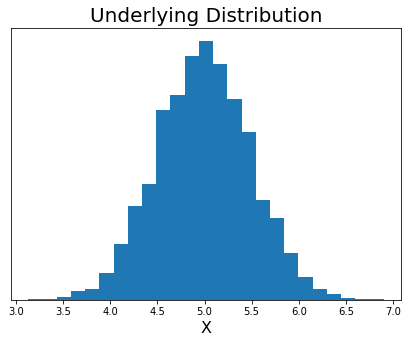

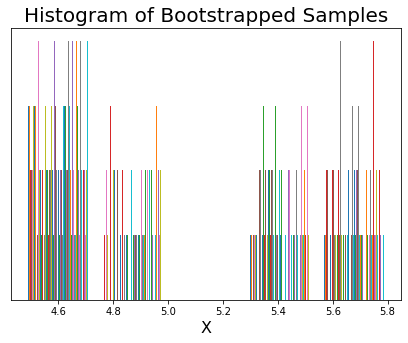

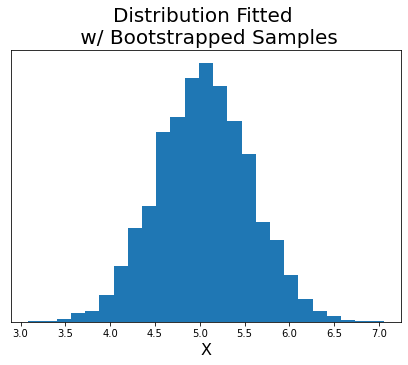

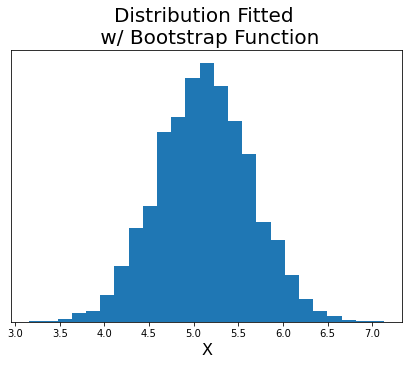




Sample choosen from underlying distribution:
 [[5.81217268 4.69412179 4.73591412 4.46351569 5.43270381]]

After creating bootstraped samples we can fit a normal distribution using the synthetic samples
 Fit mean:  5.0532328309175085 
Fit standard deviation:  0.5254439121080979

We can also use a bootstraping method created by scipy
 We parse in one sample and here are the results:

Confidence Interval for mean:
 ConfidenceInterval(low=4.7107441050839505, high=5.549814789420489) 

 Confidence Interval for standard deviation:
 ConfidenceInterval(low=0.3944687191974164, high=0.6604441679895037)

We can take the true value of these statistics to be in the middle of the distribution: 
 Bootstrapped mean:  5.130279447252219 
Bootsrapped standard deviation:  0.52745644359346


In [ ]:
## create an underlying distribution
## random normal variable with defined mu and sigma

mu = 5
sig = 1/2
rv = norm(loc = mu, scale = sig)
x = rv.rvs(5000,random_state=0) # create random samples to show dist.

sample = rv.rvs(5,random_state=1) # save one random sample for bootstrap


# define number of synthetic samples

n = 100 
samples = bsSamples(sample,n) #bootstrap

## fit based on bootstraped samples
loc, scale = norm.fit(samples)
rv2 = norm(loc, scale)
x2 = rv2.rvs(5000,random_state=0)

sample = np.reshape(sample,(1,len(sample)))

# alternatively, use scipy's built in functions for bootstraping
bsMeanIN = bootstrap(sample,np.mean,n_resamples=n)
bsSdevIN = bootstrap(sample,np.std,n_resamples=n)

## choosing middle of confidence interval for true value

bsMean = (bsMeanIN.confidence_interval[1] + bsMeanIN.confidence_interval[0])/2
bsSdev = (bsSdevIN.confidence_interval[1] + bsSdevIN.confidence_interval[0])/2

rv3 = norm(bsMean, bsSdev) # create random variable from bootstrap
x3 = rv3.rvs(5000,random_state=0) # pull samples 


## Graph everything

print("Graphs of Distribution and Fits\n")

plt.figure(1,(7,5))
plt.hist(x,bins=25)
plt.title("Underlying Distribution",fontsize=20)
plt.yticks([])
plt.xlabel("X",fontsize = 16)

plt.show()

print("\n\n")

plt.figure(2,(7,5))
plt.hist(samples,bins=5)
plt.title("Histogram of Bootstrapped Samples",fontsize=20)
plt.yticks([])
plt.xlabel("X",fontsize = 16)
plt.show()

print("\n\n")

plt.figure(3,(7,5))
plt.hist(x2,bins=25)
plt.title("Distribution Fitted \n w/ Bootstrapped Samples",fontsize=20)
plt.yticks([])
plt.xlabel("X",fontsize = 16)

plt.show()

print("\n\n")

plt.figure(4,(7,5))
plt.hist(x3,bins=25)
plt.title("Distribution Fitted \n w/ Bootstrap Function",fontsize=20)
plt.yticks([])
plt.xlabel("X",fontsize = 16)

plt.show()

print("\n\n")

print("Sample choosen from underlying distribution:\n",sample)

print("\nAfter creating bootstraped samples we can fit a", 
      "normal distribution using the synthetic samples\n",
      "Fit mean: ",loc,
      "\nFit standard deviation: ",scale)

print("\nWe can also use a bootstraping method created by scipy\n",
      "We parse in one sample and here are the results:\n")

print("Confidence Interval for mean:\n",
      bsMeanIN.confidence_interval,'\n\n',
      "Confidence Interval for standard deviation:\n",
      bsSdevIN.confidence_interval)

print("\nWe can take the true value of these statistics to be",
      "in the middle of the distribution: \n", 
      "Bootstrapped mean: ", bsMean,
      "\nBootsrapped standard deviation: ",bsSdev)

